<a href="https://colab.research.google.com/github/Madmjce/yolov8s_PPEdetecton/blob/main/train_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue May 30 08:26:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
import os

drive.mount("/content/gdrive", force_remount=True)
os.chdir('gdrive/MyDrive/')

Mounted at /content/gdrive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive


In [4]:
#cd /content/gdrive/MyDrive/yolov8

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
model = YOLO(f'{HOME}/yolov8s.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [8]:
results[0].boxes.xyxy


tensor([[6.00000e+01, 2.50000e+02, 6.48000e+02, 1.27300e+03],
        [1.00000e+00, 3.50000e+02, 4.99000e+02, 1.27700e+03],
        [2.90000e+02, 5.87000e+02, 5.34000e+02, 1.25200e+03],
        [6.27000e+02, 7.34000e+02, 6.99000e+02, 7.88000e+02]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.79679, 0.69055, 0.68980, 0.44159], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([16.,  0., 26.,  2.], device='cuda:0')

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3EmvWjzBX1XrL8BCG0TD")
project = rf.workspace("danang-university-of-technology-xddua").project("ppe-detect-v3")
dataset = project.version(15).download("yolov8")


/content/gdrive/MyDrive/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d0df166662b8aed81f005e989abefec6716a72e129f52dd9ac627aa2eac36824
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to PPE-detect-v3-15 in yolov8:: 100%|██████████| 3342/3342 [00:20<00:00, 162.84it/s]


In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=16 epochs=22 imgsz=640 plots=True

/content/gdrive/MyDrive
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/datasets/PPE-detect-v3-15/data.yaml, epochs=22, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [14]:
!ls {HOME}/runs/detect/train5/

args.yaml					    train_batch1009.jpg
confusion_matrix.png				    train_batch1010.jpg
events.out.tfevents.1685435723.4766765f50dc.2838.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1008.jpg				    weights


/content/gdrive/MyDrive


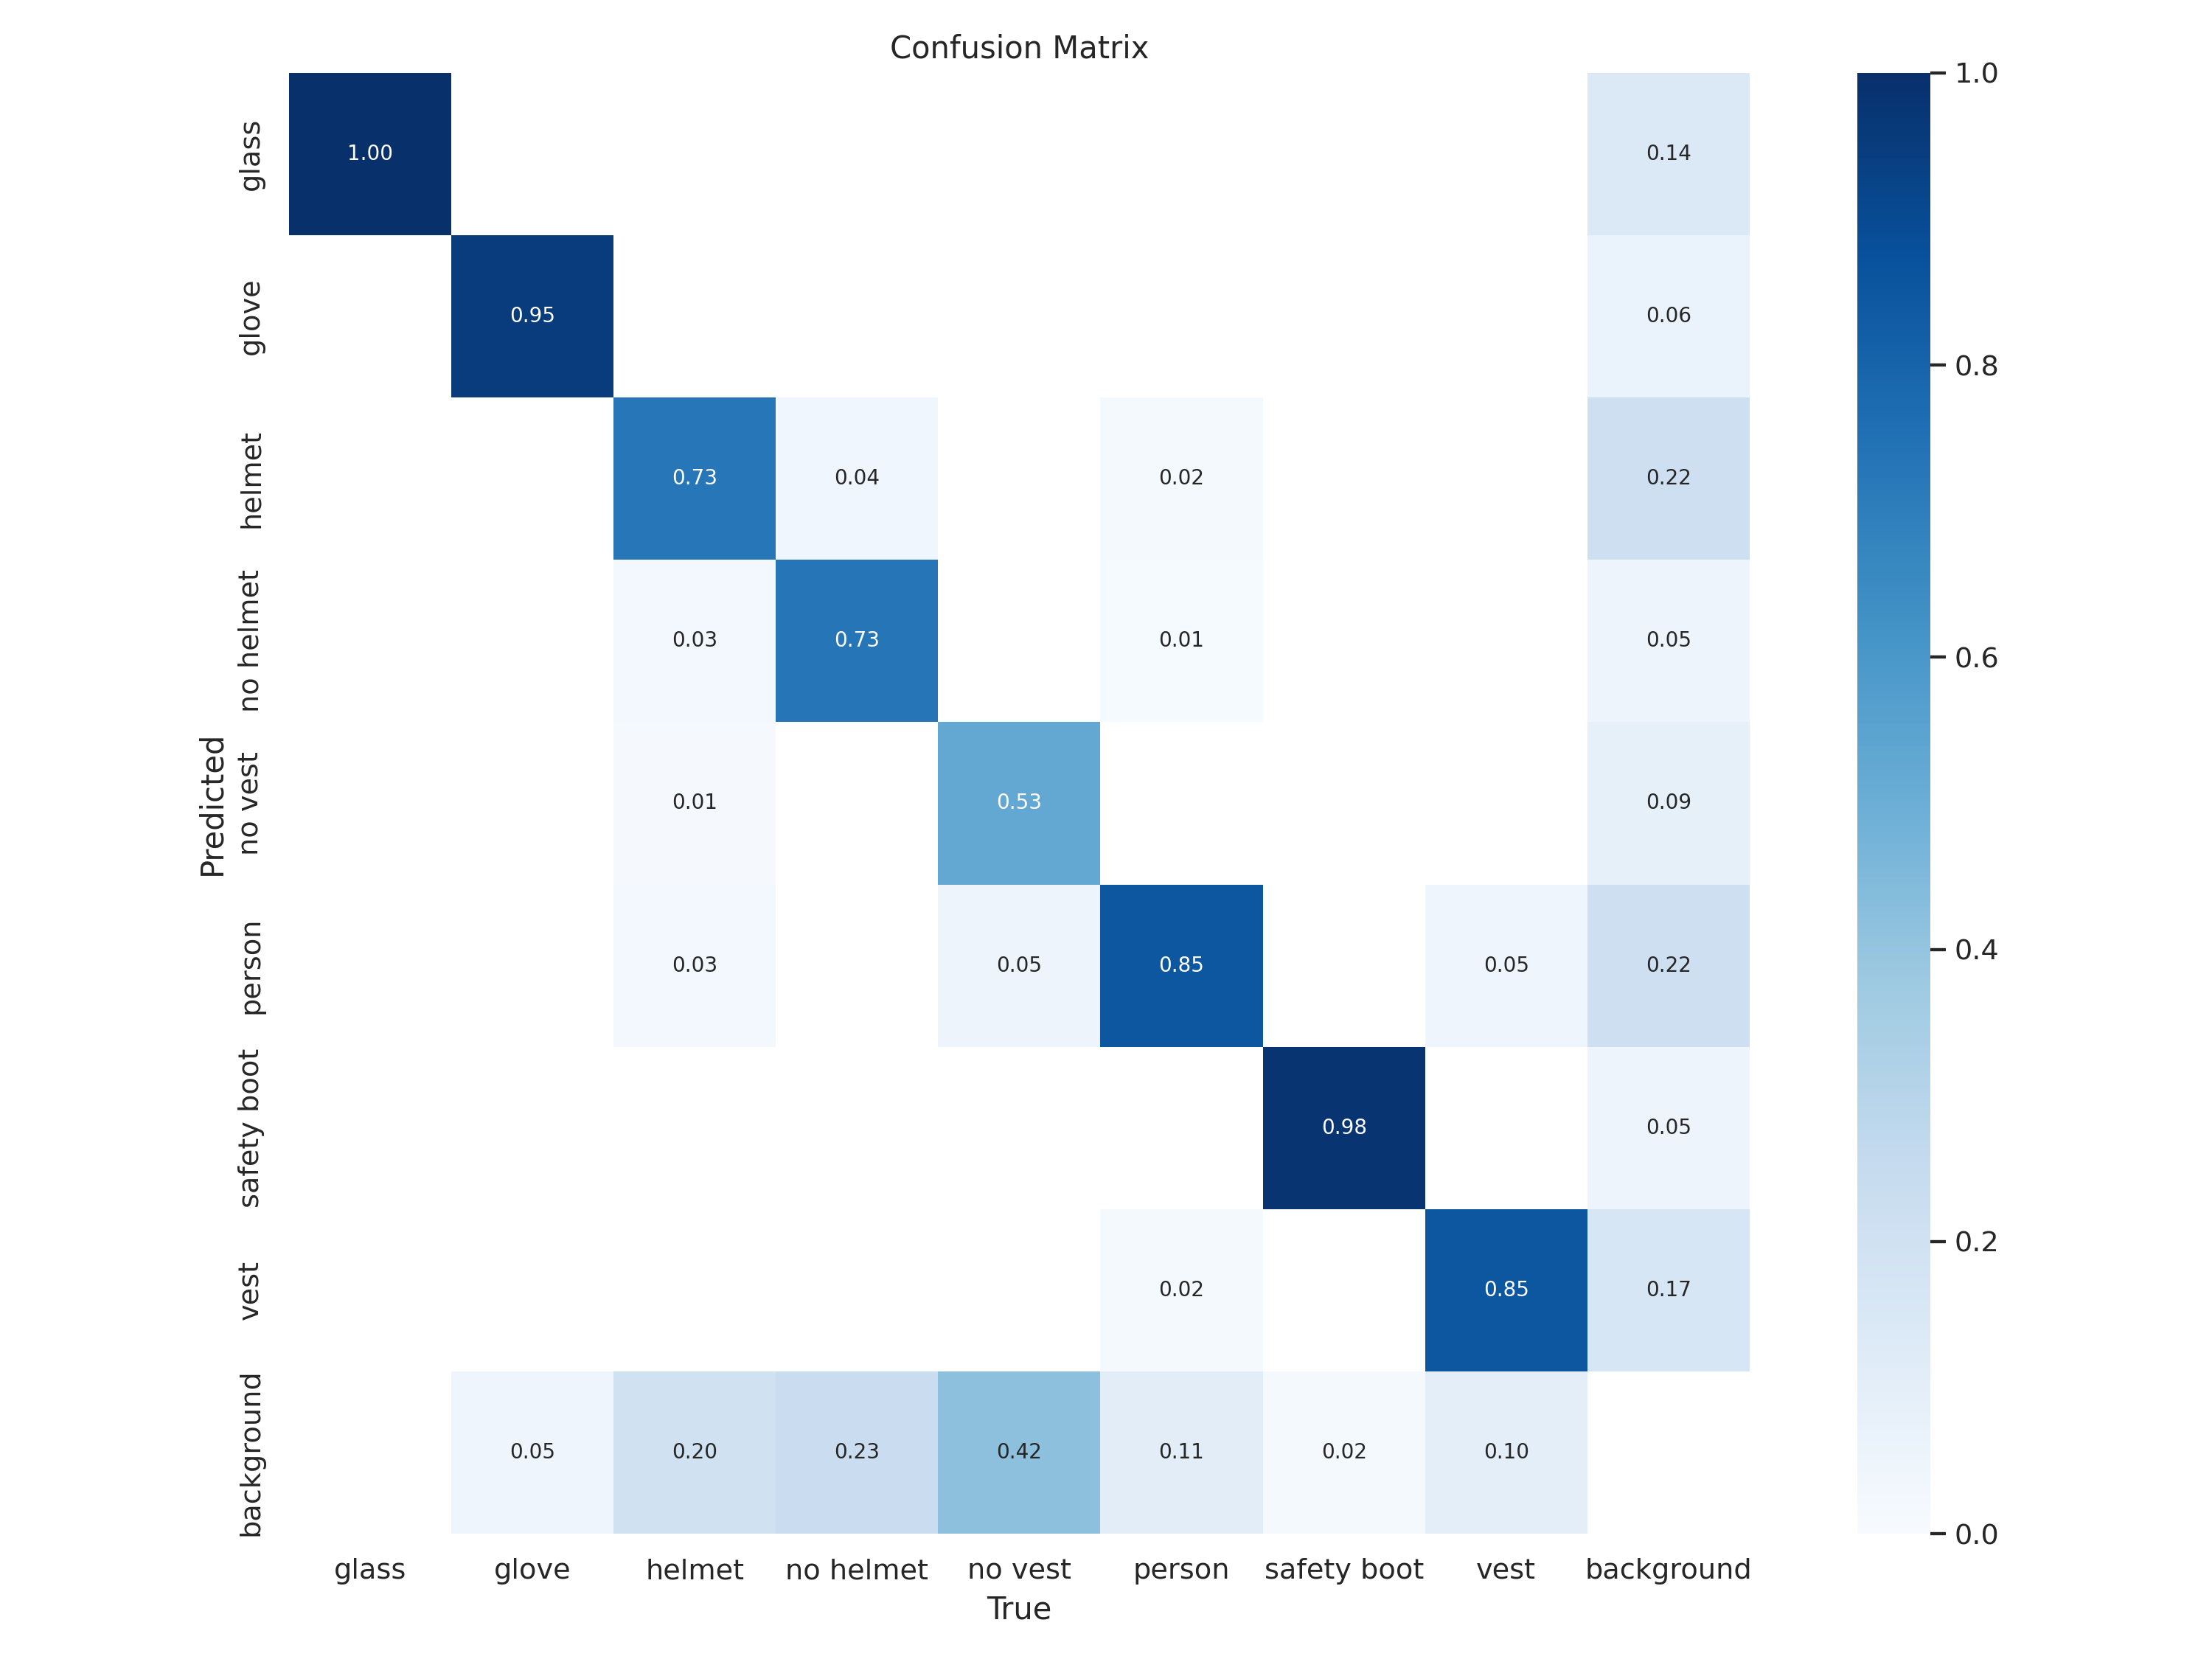

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/content/gdrive/MyDrive


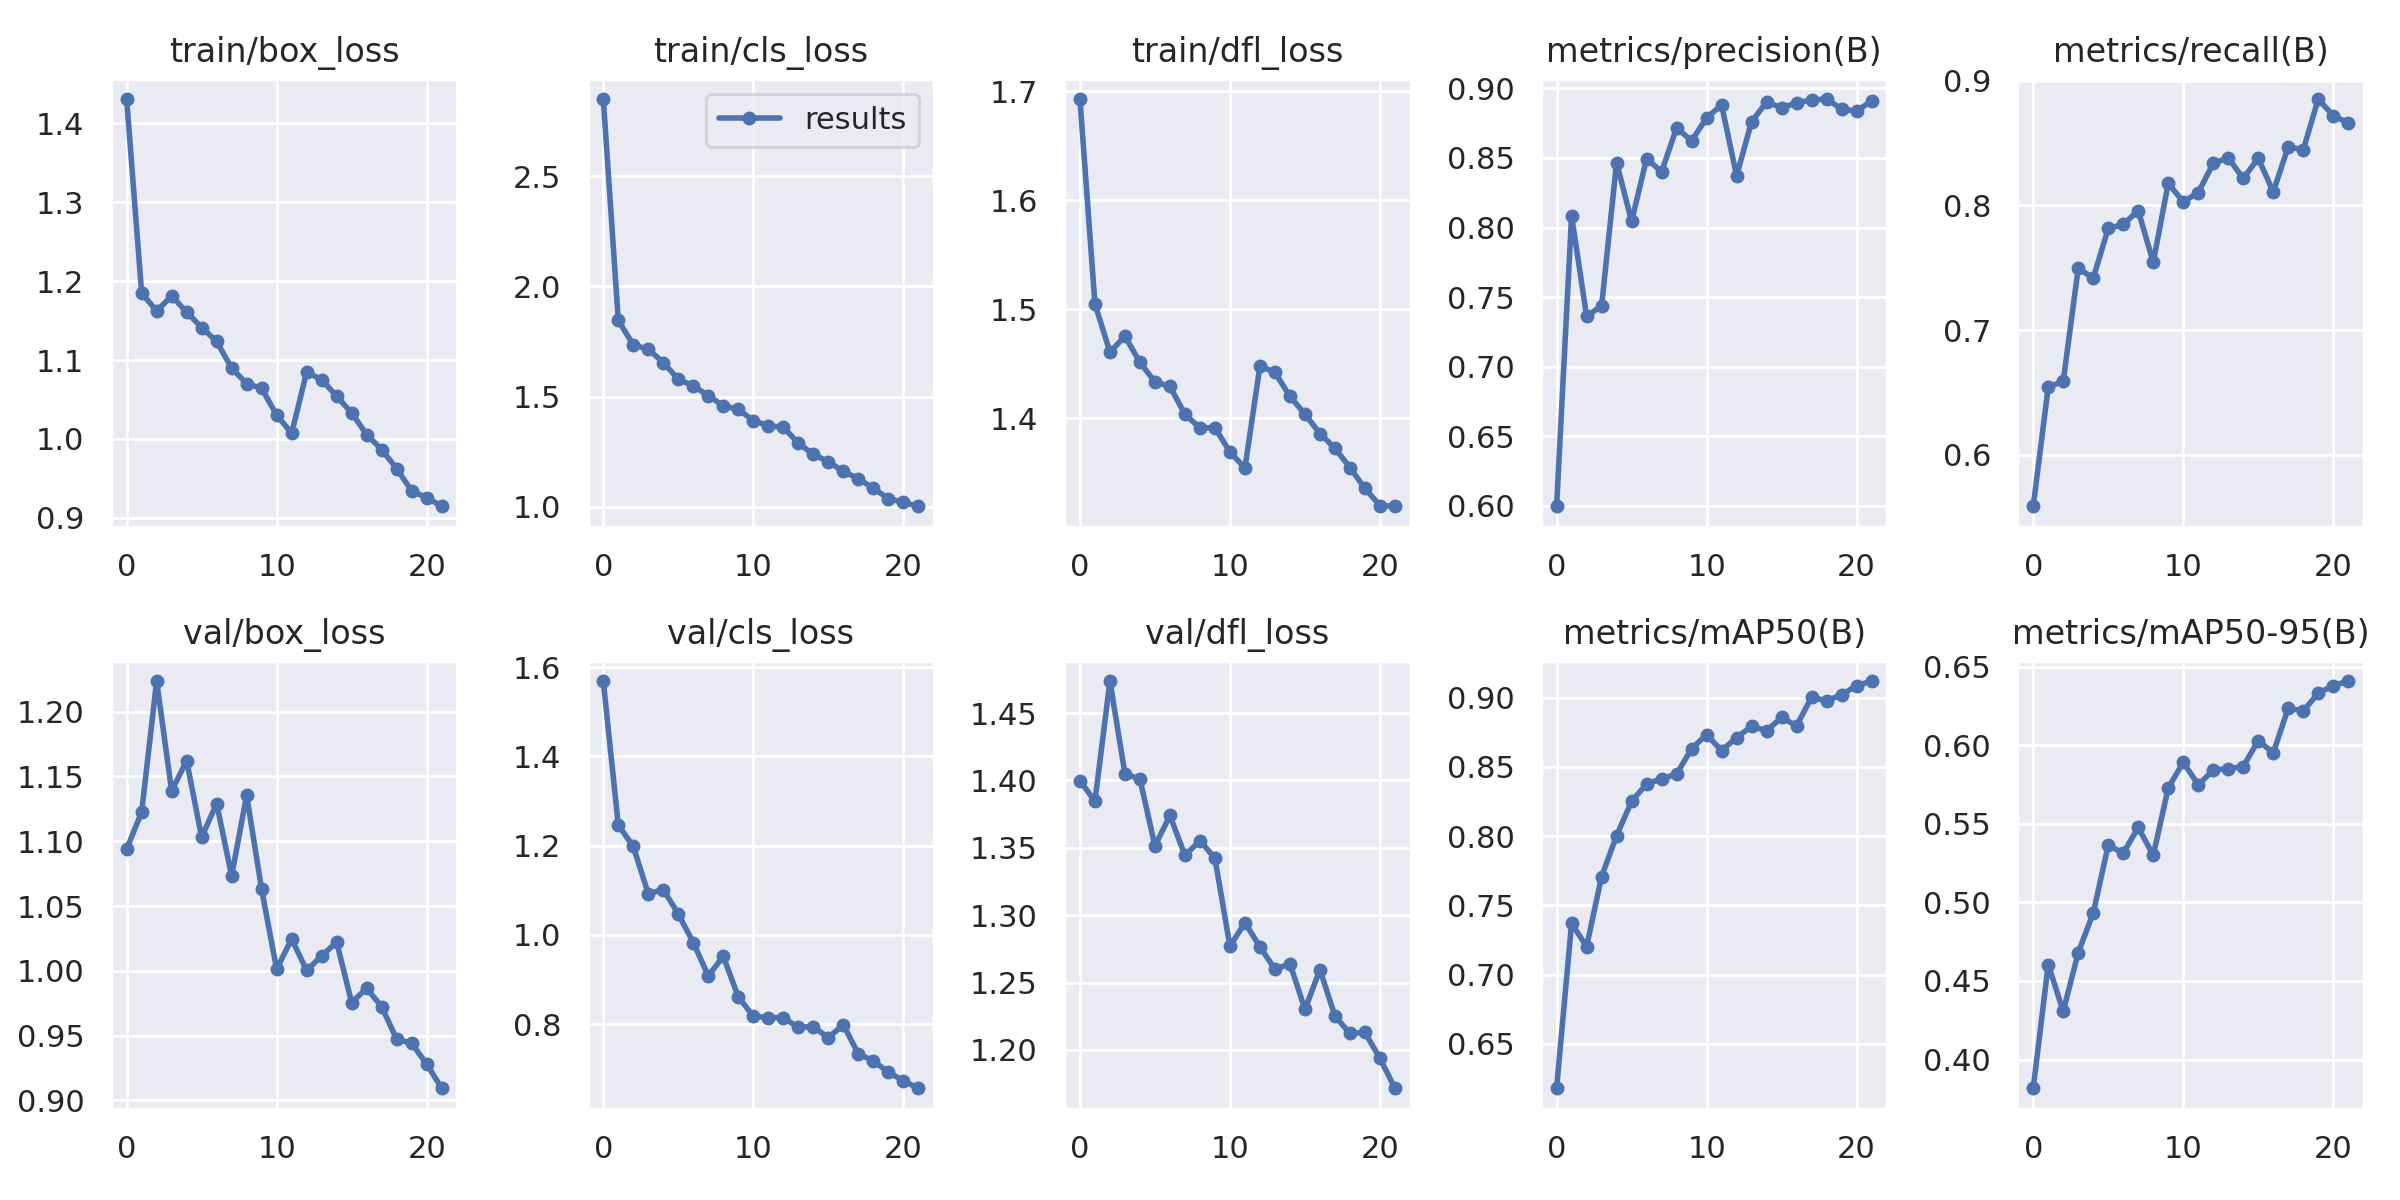

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/content/gdrive/MyDrive


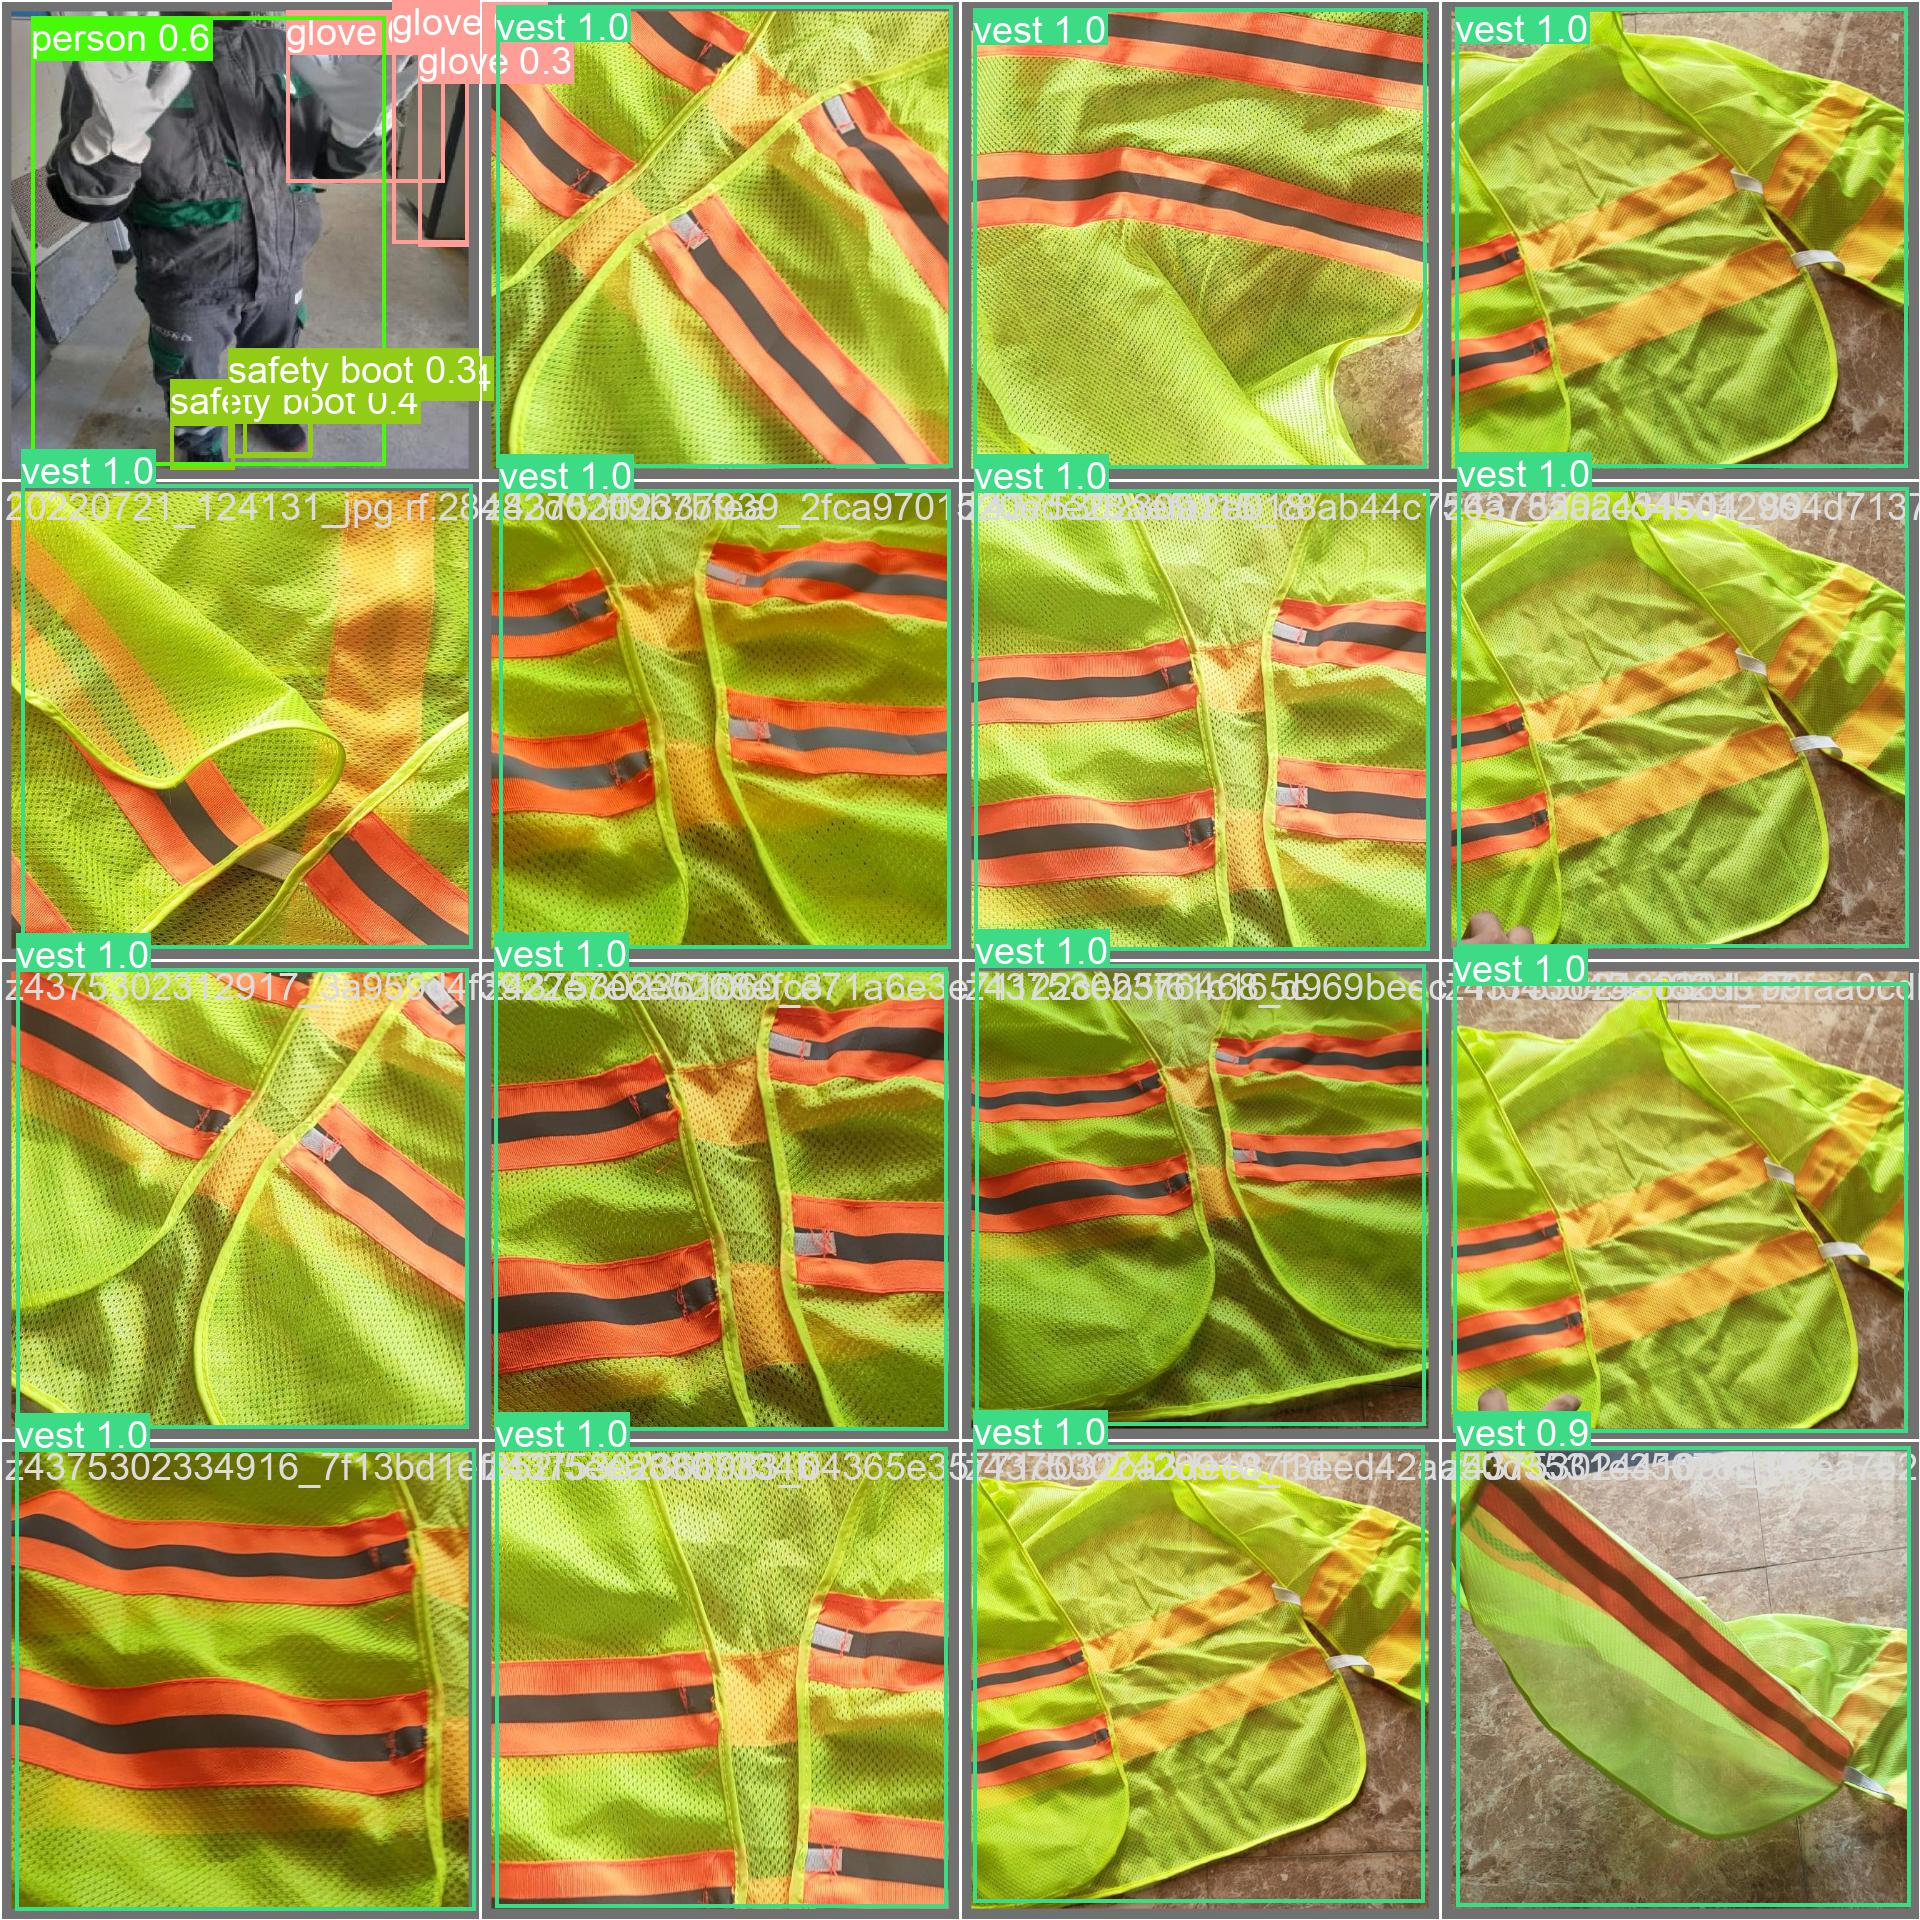

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [18]:
%cd {HOME}
!pip install tensorrt
!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16973 sha256=641cd740708489b7862d06aa8b167446243737b7331ab581c2ff79def5ba985c
  Stored in directory: /root/.cache/pip/wheels/6d/29/56/abdffd4c604f255b5254bef3f1c598ab7811ea020540599438
Successfully built tensorrt
2023-05-30 09:06:18.484084: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/valid/labels.cache... 162 images, 0 backgrounds, 0 corrupt: 100% 162/162 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/valid/images/z4375239059599_8b5

In [20]:
%cd {HOME}
!pip install tensorrt
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/gdrive/MyDrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-30 09:09:38.241529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
image 1/161 /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/test/images/20220621_132920_jpg.rf.63ea8298fabd5cb69d6f323774fedea3.jpg: 640x640 1 helmet, 1 person, 2 safety boots, 1 vest, 15.9ms
image 2/161 /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/test/images/20220721_161935_jpg.rf.7baf233a3627aac11cad9e7f3bc63d26.jpg: 640x640 1 glove, 16.0ms
image 3/161 /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/test/images/IMG-20221020-WA0067_jpg.rf.bafa2be142ce2a271ec0b4432631599f.jpg: 640x640 1 glove, 16.0ms
image 4/161 /content/gdrive/MyDrive/datasets/PPE-detect-v3-15/test/im

In [21]:
results = model.predict("https://cuahangbaoholaodong.com/wp-content/uploads/2017/10/mu-bao-ho-lao-dong-la-gi.jpg")

100%|██████████| 26.2k/26.2k [00:00<00:00, 127kB/s] 


In [22]:
result = results[0]

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:8]:
      display(Image(filename=image_path, width=600))
      print("\n")